In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Plot a Scatter plot of area and price

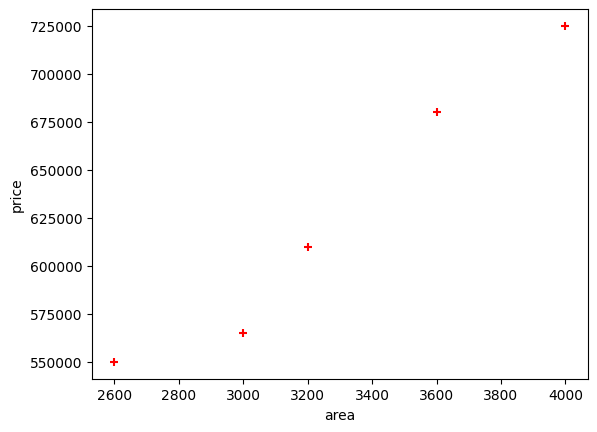

In [3]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'],df['price'],color='r',marker='+')


In [4]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [6]:
len(x_train)

3

In [7]:
len(x_test)

2

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([596315.78947368, 723947.36842105])

In [9]:
model.coef_

array([127.63157895])

In [10]:
model.intercept_

213421.05263157893

In [11]:
y=model.coef_*5000+model.intercept_
y

array([851578.94736842])

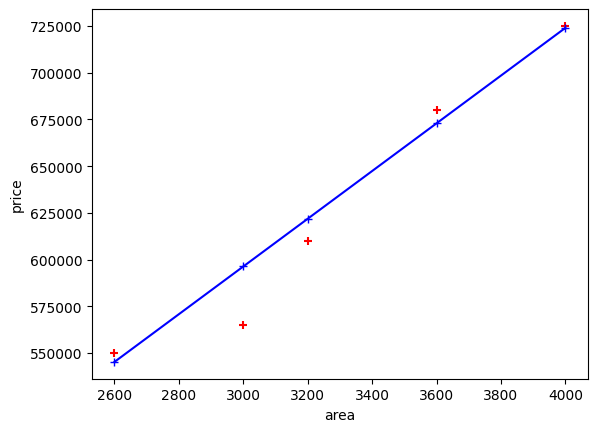

In [12]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'],df['price'],color='r',marker='+')
plt.plot(df['area'],model.predict(df[['area']]),color='blue',marker='+')

In [13]:
df1=pd.read_csv('areas.csv')
df1

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [14]:
pd.set_option('display.float_format','{:.2f}'.format)
df1['prices']=model.predict(df1)

In [15]:
df1

,area,prices
0,1000,341052.63
1,1500,404868.42
2,2300,506973.68
3,3540,665236.84
4,4120,739263.16
5,4560,795421.05
6,5490,914118.42
7,3460,655026.32
8,4750,819671.05
9,2300,506973.68


In [16]:
df1.to_csv('House_prediction.csv',index=False)